In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import LMSC_optimize
from visualizingData import *
import pandas as pd
import os
import ast

In [2]:
loaded_matrix = np.load('.\\artificialData\\artificialRatingsV3.npy', allow_pickle=True).item()
sampled_mask = np.load('.\\artificialData\\mask.npy', allow_pickle=True).item().toarray()
dense_matrix = loaded_matrix.toarray()

In [3]:
dense_matrix = dense_matrix[:200,:150]
sampled_mask = sampled_mask[:200,:150]

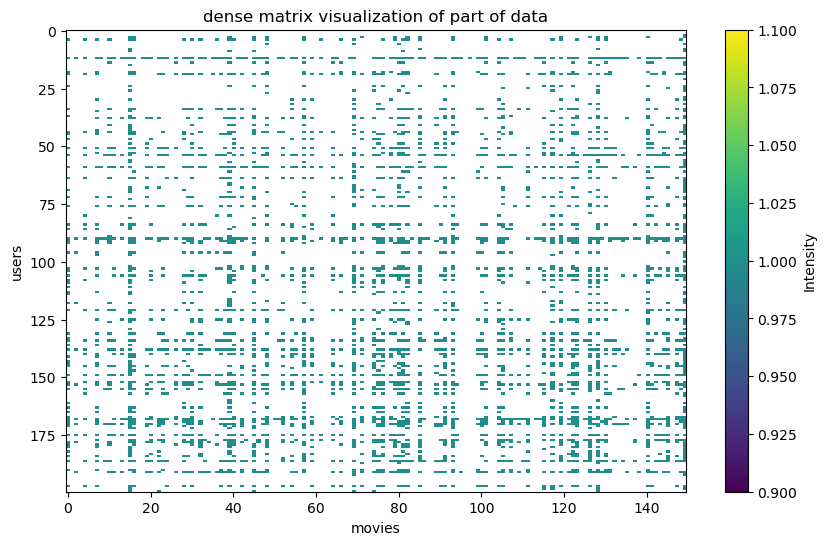

In [4]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [5]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lambdas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Regularization parameter λ values
gammas = np.array([0, 0.001, 0.01])  # Step size or learning rate γ values
delta = 1e-2  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization

# Generate rhos for each lambda
rhos = np.round(10*np.arange(.1,1.5, .1))/10

# List to store results
results = []




In [6]:

    
# # Iterate over rho values
# for rho in rhos: 
#     # Iterate over lambda values
#     for lambda_ in lambdas:
#         # Iterate over gamma values
        
#         for gamma in gammas:
#             # Calculate epsilon based on matrix size and gamma
#             epsilon = m * n * gamma  # Error threshold as defined in the paper
            
#             # Print current parameter settings
#             print(f"Current settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}")

#             # Run the optimization function with the current parameters
#             P_final, Z_final, u_final, y_final, s_final, errors, r_errors, rank = LMSC_optimize(
#                 rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations
#             )
            
#             print(f"Finished w/ settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}; r{rank}\n")
#             # Store the results in a dictionary
#             result = {
#                 'lambda': lambda_,
#                 'rho': rho,
#                 'gamma': gamma,
#                 'errors': errors,
#                 'relative_errors': r_errors,
#                 'rank': rank
#             }
#             results.append(result)


In [7]:
# # Assuming 'results' is the list you populated with dictionaries as shown earlier
# results_df = pd.DataFrame(results)  # Convert the results list to a DataFrame

# # Define the directory name
# directory = 'lsmc_validation'

# # Create the directory if it does not exist
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Define the path to save the DataFrame
# file_path = os.path.join(directory, 'validationv1.csv')

# # Save the DataFrame as a CSV file
# results_df.to_csv(file_path, index=False)

# print(f"Results saved to {file_path}")


In [8]:


# Define the directory and file path
directory = 'lsmc_validation'
file_path = os.path.join(directory, 'validationv1.csv')

# Load the DataFrame from the CSV file
results_df = pd.read_csv(file_path)

# Display the loaded DataFrame
print(results_df.head())  # Show the first few rows of the DataFrame


   lambda  rho  gamma                                             errors  \
0     0.1  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
1     0.1  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   
2     0.1  0.1  0.010  [[1.8516961322197427, 1.3584203002705382], [2....   
3     0.2  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
4     0.2  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   

                                     relative_errors  rank  
0  [(3.8917355476968214, 1.9329862697031648, 5.82...    98  
1  [(3.8917355476968214, 1.9329862697031648, 5.82...    96  
2  [(3.8917355476968214, 1.9329862697031648, 5.82...    84  
3  [(3.8917355476968214, 1.9329862697031648, 5.82...   101  
4  [(3.8917355476968214, 1.9329862697031648, 5.82...   101  


In [ ]:

def rhoCheckPlots(rho):
    # Assuming your DataFrame is named df_results
    rho_10_data = results_df[results_df['rho'] == rho]

    rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


    last_2_errors = []
    for err_list in np.array(rho_10_data['errors']):
        last_2_errors.append(err_list[-1])

    # Convert data to a numpy array for easier slicing
    data_array = np.array(last_2_errors)

    # Prepare data for three different gamma values
    gamma_0_data = data_array[::3]       # Rows for gamma = 0
    gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
    gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01
    
    RMSE_1 = gamma_0_data[:,1]
    RMSE_2 = gamma_001_data[:,1]
    RMSE_3 = gamma_01_data[:,1]
    # x = lambdas
    plt.plot(lambdas,RMSE_3, 'o-' ,label='gamma=0.01')
    plt.plot(lambdas,RMSE_2,'o-' ,label='gamma=0.001')
    plt.plot(lambdas,RMSE_1, 'o-' ,label='gamma=0')
    plt.xlabel('lambda')
    plt.ylabel('RMSE')
    
    plt.title(f"RMSE Error for Lambdas at rho={rho}")
    plt.legend()
    plt.show()

C:\Users\kesol\AppData\Local\Temp\ipykernel_24592\3945366034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


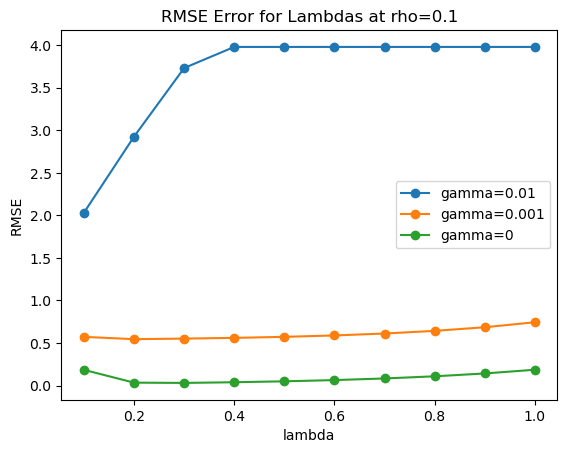

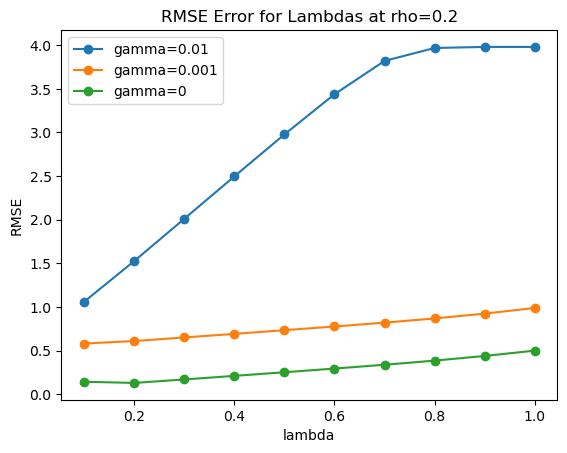

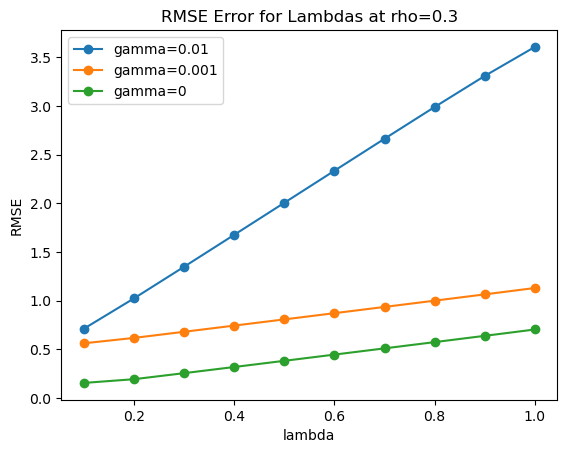

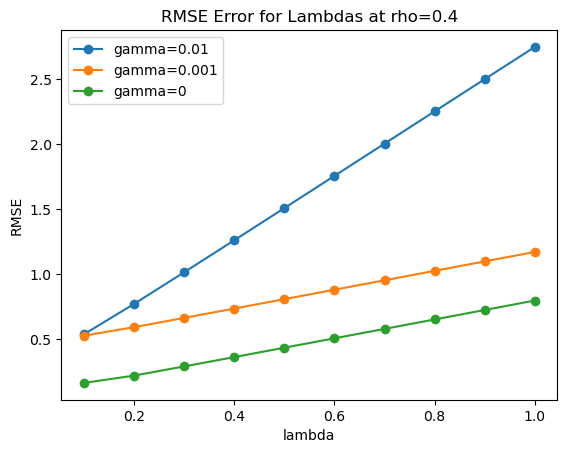

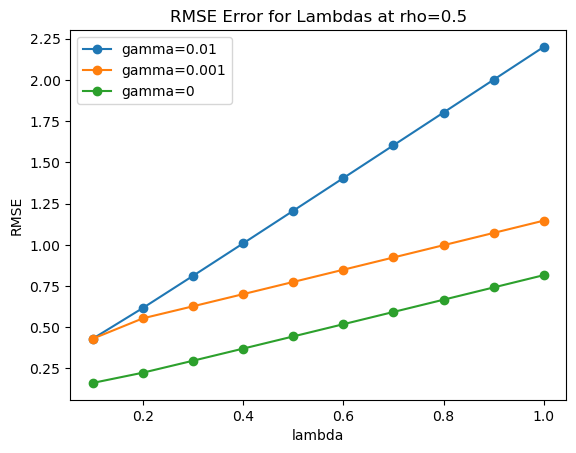

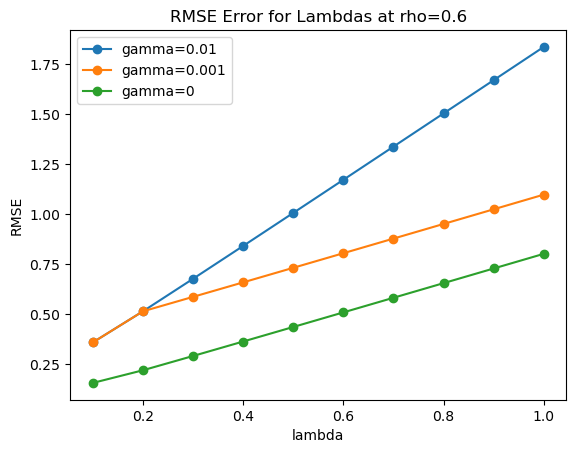

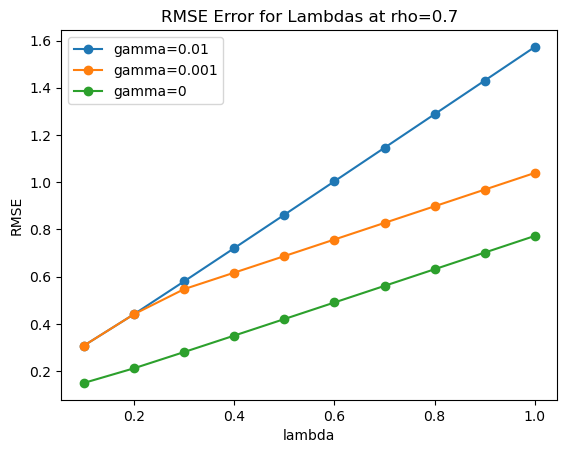

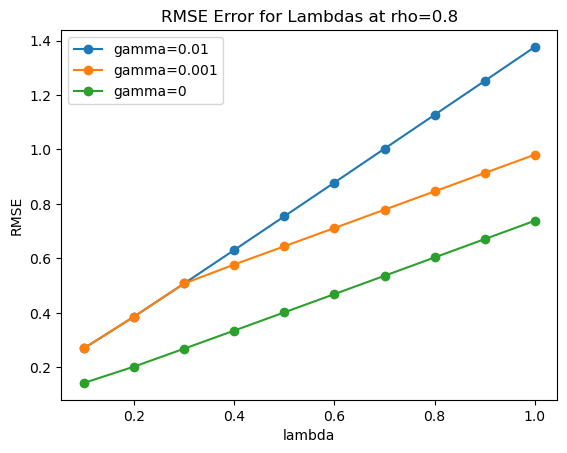

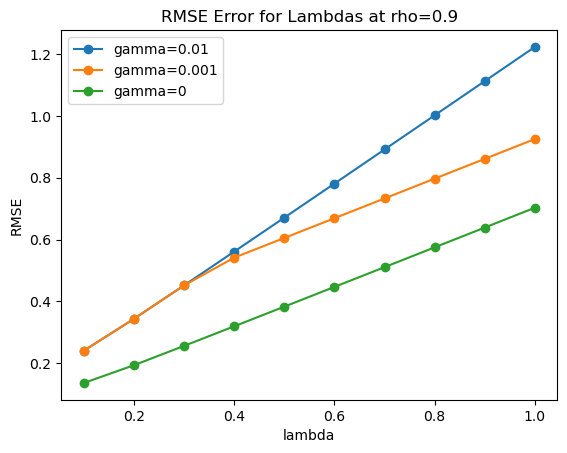

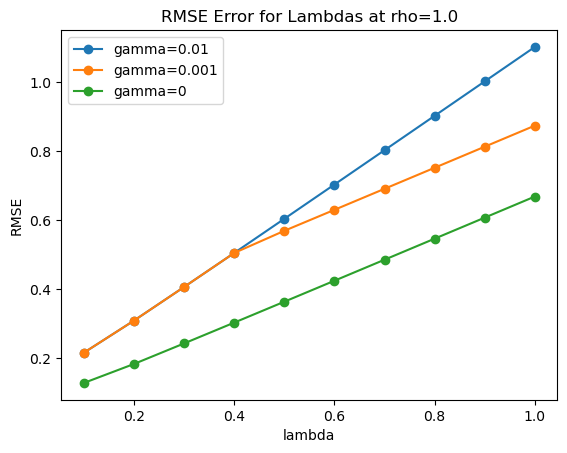

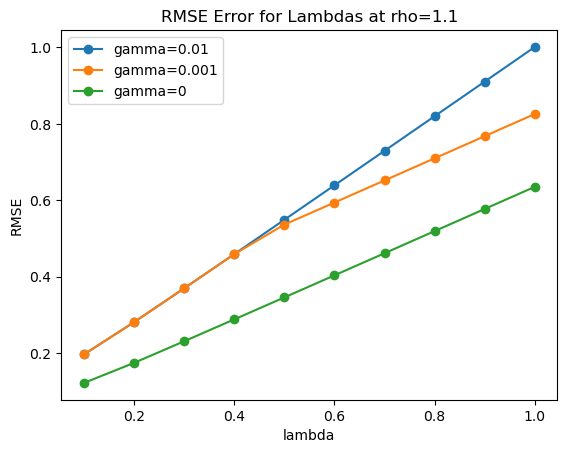

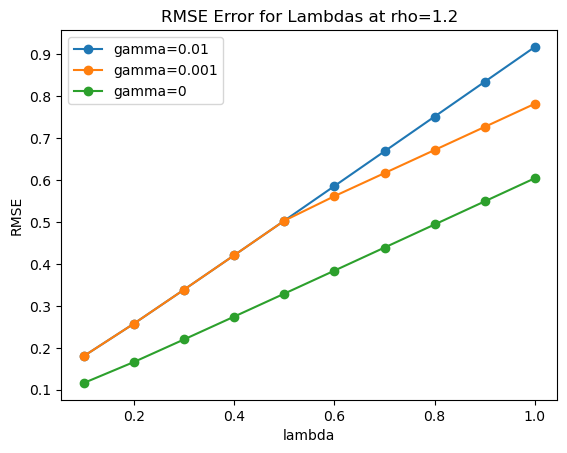

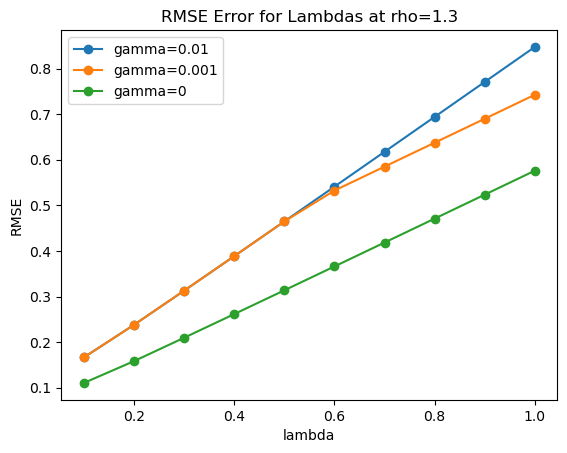

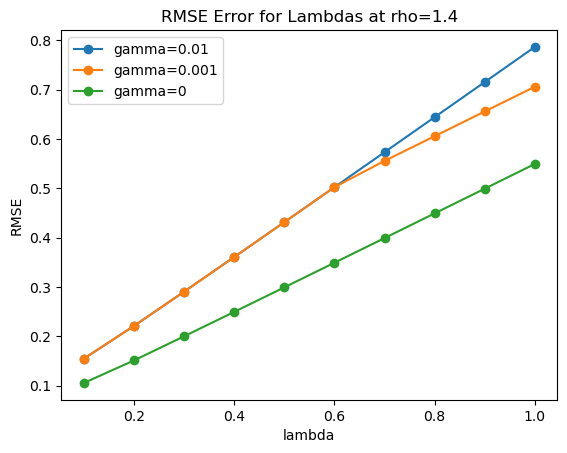

In [12]:
for r in rhos:
    rhoCheckPlots(r)

In [ ]:
results_df['errors'] = results_df['errors'].apply(ast.literal_eval)

for i in range(len(results_df['errors'])):
    results_df['errors'][i]=results_df['errors'][i][-1][1]

C:\Users\kesol\AppData\Local\Temp\ipykernel_24592\400270853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['errors'][i]=results_df['errors'][i][-1][1]


In [61]:
# Removing a single column
df = results_df.drop('relative_errors', axis=1)


In [63]:

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df.head())


Updated DataFrame:
   lambda  rho  gamma    errors  rank
0     0.1  0.1  0.000  0.184199    98
1     0.1  0.1  0.001  0.571661    96
2     0.1  0.1  0.010  2.031716    84
3     0.2  0.1  0.000  0.033871   101
4     0.2  0.1  0.001  0.545155   101


In [104]:
def checkPlots(gamma, r=False):
    # Assuming your DataFrame is named df_results
    err_arr = np.array(df['errors'])
    r_arr = np.array(df['rank'])

    if r == True:
        err_arr=r_arr


    # Prepare data for three different gamma values
    gamma_0_data = err_arr[::3]       # Rows for gamma = 0
    gamma_001_data = err_arr[1::3]     # Rows for gamma = 0.001
    gamma_01_data = err_arr[2::3]      # Rows for gamma = 0.01
    
    if gamma == 0:
        err_li = gamma_0_data
    elif gamma == 0.001:
        err_li = gamma_001_data
    elif gamma == .01:
        err_li = gamma_01_data
    
    
    for i in range(10):
        
        plt.plot(rhos,err_li[i::10], 'o-' ,label=f'lamda = {round(.1*(i+1),1)}')
    # # x = lambdas
    
    # plt.plot(lambdas,RMSE_2,'o-' ,label='gamma=0.001')
    # plt.plot(lambdas,RMSE_1, 'o-' ,label='gamma=0')
    plt.xlabel('rhos')
    plt.ylabel('RMSE')
    plt.title(f"RMSE Error for Lambdas at gamma={gamma}")
    
    if r == True:
        plt.ylabel('Rank')
        plt.title(f"Rank for Lambdas at gamma={gamma}")
    plt.legend()
    plt.show()

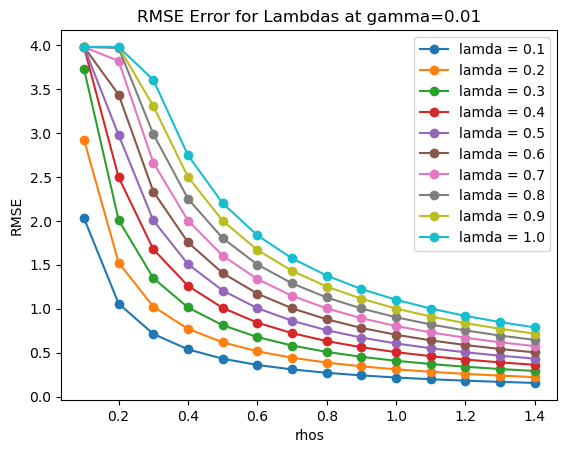

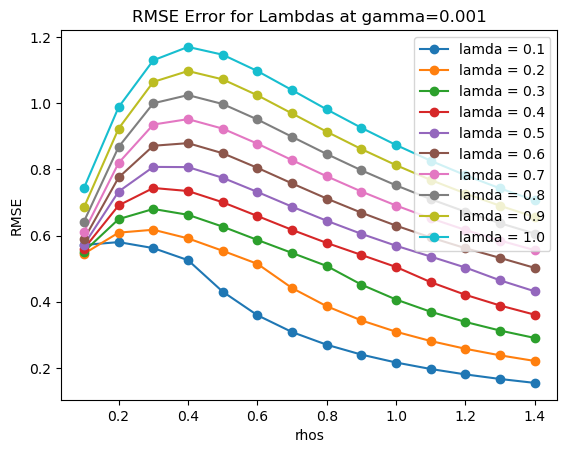

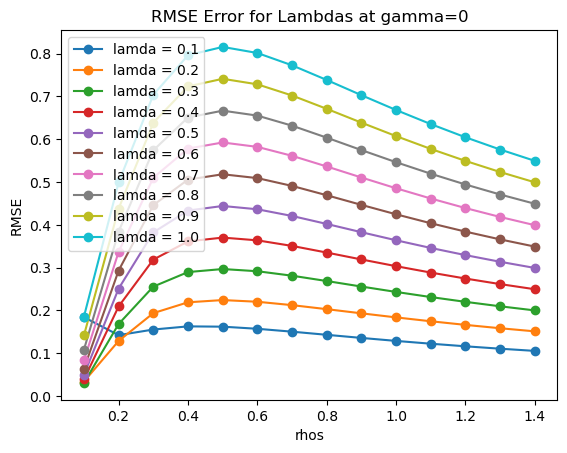

In [105]:
checkPlots(0.01)
checkPlots(0.001)
checkPlots(0)

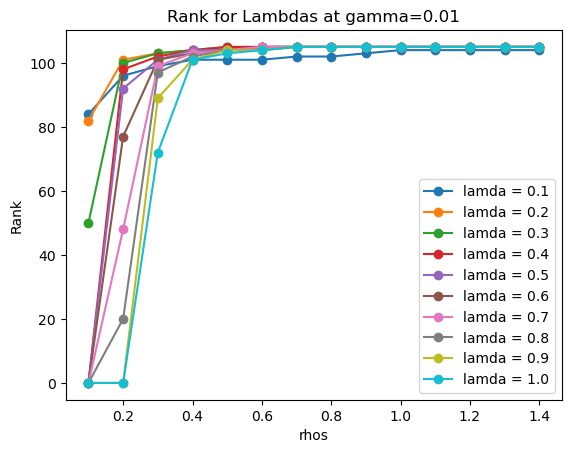

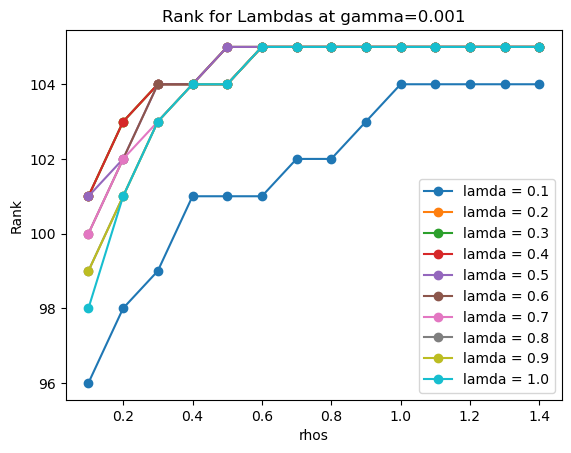

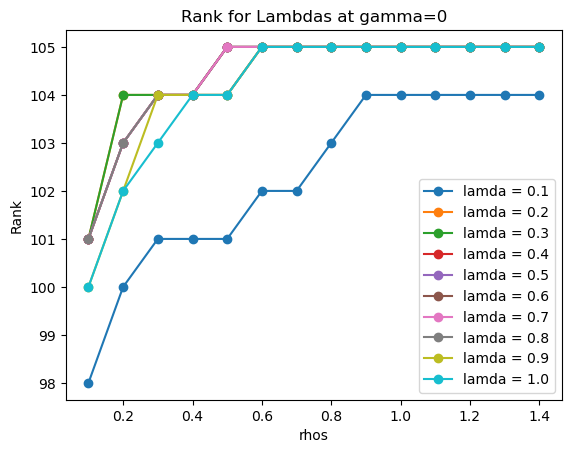

In [106]:
checkPlots(0.01, True)
checkPlots(0.001,True)
checkPlots(0,True)

In [112]:

def SVD_truncated(A, k):
    """
    Apply the thresholding operator to the singular values of X
    """
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n= len(S)
    
    if k > n:
        k = n
    
    S= S[:k]
    U = U[:, :k]
    V = V[:k, :]
    return (U* S) @ V

In [115]:
np.linalg.norm(SVD_truncated(dense_matrix,105)-dense_matrix, 'fro')


0.00013839518497823881

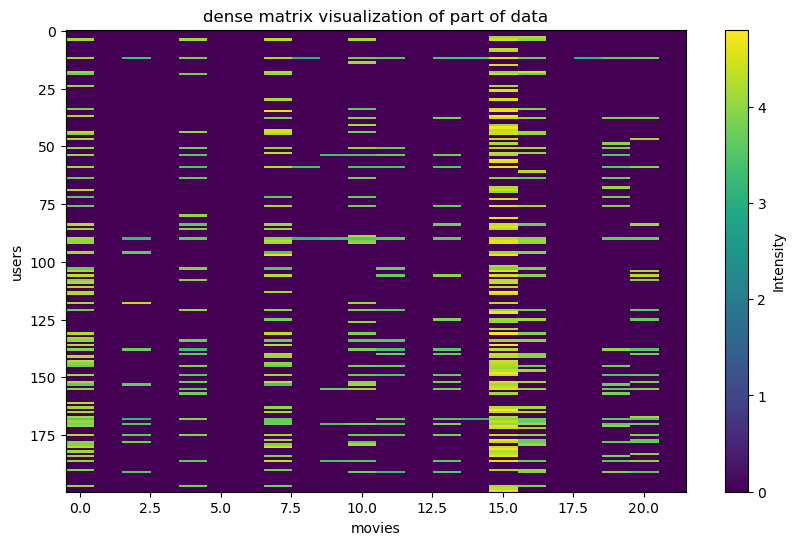

In [15]:
visualizeData(dense_matrix[:,:22])

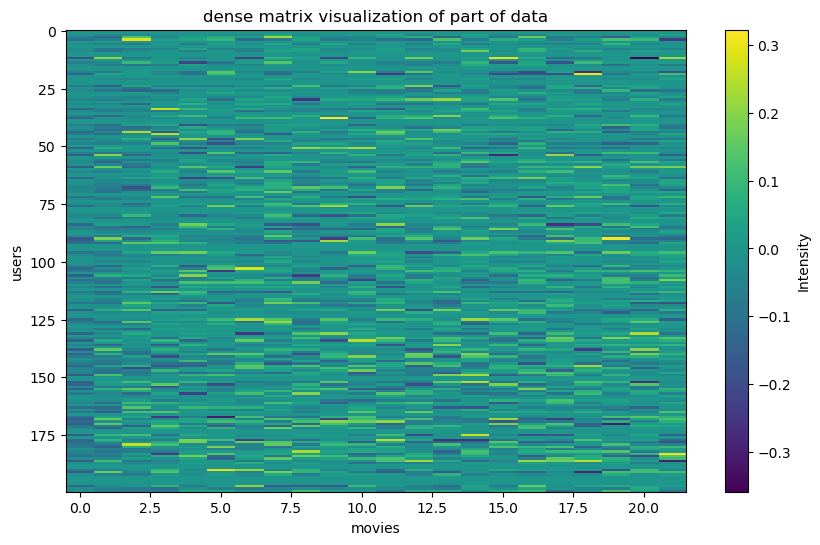

In [12]:
visualizeData(SVD_truncated(dense_matrix, 22)[0])